In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats


# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

### Import all files

In [2]:
commune = pd.read_excel('commune.xlsx')

enroll = pd.read_csv('enroll.csv')

industry = pd.read_csv('industry.csv')

ord = pd.read_csv('ord.csv')

quest = pd.read_csv('quest.csv')

study_domain = pd.read_csv('study_domain.csv')

technology = pd.read_csv('technology.csv')

transaction = pd.read_csv('transaction.csv')

In [3]:
quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          250 non-null    int64 
 1   gender              250 non-null    object
 2   dob                 244 non-null    object
 3   commune             250 non-null    object
 4   created_at          250 non-null    object
 5   modified_at         250 non-null    object
 6   department          249 non-null    object
 7   education_level     250 non-null    object
 8   university          250 non-null    object
 9   study_domain        250 non-null    object
 10  current_employed    250 non-null    object
 11  formal_sector_job   250 non-null    object
 12  have_computer_home  250 non-null    object
 13  internet_at_home    250 non-null    object
 14  hear_AA_1           250 non-null    object
 15  after_AA            250 non-null    object
 16  quest_id            250 no

In [4]:
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

quest_com=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
quest_com.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01


In [5]:
transaction['Payed'] = 'Yes'
ord['Payed'] = 'Yes'

x = transaction.loc[:,['Payed','user_id','created_at']]
y = ord.loc[:,['Payed','user_id','created_at']]
trans_ord= pd.concat([x,y],axis=0)
trans_ord= trans_ord.rename(columns={'created_at': 'Payment_Date'})
trans_ord.head()

,Payed,user_id,Payment_Date
0,Yes,40976440,2021-03-08T05:08:50.832Z
1,Yes,41179271,2021-03-08T17:26:35.841Z
2,Yes,40973512,2021-03-08T18:52:09.147Z
3,Yes,41177453,2021-03-08T19:06:32.837Z
4,Yes,40797121,2021-03-08T22:10:00.796Z


In [6]:
enroll.head()
enroll= enroll.rename(columns={'created_at': 'enroll_date'})
enroll['is_enroll'] = 'Yes'

In [9]:
en_tr_ord=pd.merge(enroll,trans_ord, how = 'left',on = ['user_id'] )
en_tr_ord= en_tr_ord.loc[:,['user_id','quest_id','enroll_date','Payed','Payment_Date','is_enroll']]
en_tr_ord



,user_id,quest_id,enroll_date,Payed,Payment_Date,is_enroll
0,29816173,NaN,2020-12-12T06:41:29.844Z,NaN,NaN,Yes
1,35229766,NaN,2020-12-13T14:41:17.720Z,NaN,NaN,Yes
2,31987560,NaN,2020-12-15T00:53:06.499Z,NaN,NaN,Yes
3,35616451,NaN,2020-12-18T18:38:55.683Z,NaN,NaN,Yes
4,35390649,NaN,2020-12-21T14:45:06.528Z,NaN,NaN,Yes
...,...,...,...,...,...,...
143,41508160,906b65e3-ce95-11eb-a294-7c67a234f601,2021-03-14T02:16:08.736Z,Yes,2021-03-14T02:16:08.983Z,Yes
144,41564742,906636cf-ce95-11eb-8679-7c67a234f601,2021-03-14T04:20:30.803Z,Yes,2021-03-14T04:20:23.483Z,Yes
145,41569249,906241d5-ce95-11eb-9850-7c67a234f601,2021-03-14T07:34:09.491Z,Yes,2021-03-14T07:34:09.638Z,Yes
146,41587952,906b3c86-ce95-11eb-b6a7-7c67a234f601,2021-03-14T15:34:39.800Z,Yes,2021-03-14T15:34:35.014Z,Yes


In [10]:
QuCoEnTrOrd=pd.merge(left=quest_com,right=en_tr_ord, how = 'left', on=['quest_id'])
QuCoEnTrOrd['is_enroll']= QuCoEnTrOrd['is_enroll'].fillna('no')
QuCoEnTrOrd['Payed']= QuCoEnTrOrd['Payed'].fillna('no')
QuCoEnTrOrd.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE,user_id,enroll_date,Payed,Payment_Date,is_enroll
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,39726355.0,2021-02-14T23:15:19.500Z,no,NaN,Yes
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,40117659.0,2021-02-20T21:20:37.450Z,Yes,2021-03-03T23:00:11.974Z,Yes
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no


In [11]:
StDoDum = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
StDoDum=StDoDum.groupby("quest_id").sum()
StDoDum
QuCoEnTrOrdStd=pd.merge(left=QuCoEnTrOrd,right=StDoDum, how = 'left', on=['quest_id'])
QuCoEnTrOrdStd

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,is_enroll,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
tech_dum = pd.get_dummies(data=technology[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
tech_dum=tech_dum.groupby("quest_id").sum()
tech_dum
QuCoEnTrOrdStdTechd=pd.merge(left=QuCoEnTrOrdStd,right=tech_dum, how = 'left', on=['quest_id'])
QuCoEnTrOrdStdTechd
QuCoEnTrOrdStdTechd.columns
columns_drop= ['Unnamed: 0','modified_at','current_employed','Commune_Id','Commune_FR','ADM1_PCODE','study_domain','department','university','commune']
AA_Bootcamp= QuCoEnTrOrdStdTechd.drop(labels=None,columns=columns_drop, level=None, inplace=False)
QuCoEnTrOrdStdTechd.columns

Index(['Unnamed: 0', 'gender', 'dob', 'commune', 'created_at', 'modified_at',
       'department', 'education_level', 'university', 'study_domain',
       'current_employed', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'hear_AA_1', 'after_AA', 'quest_id', 'Commune_en',
       'Commune_FR', 'Commune_Id', 'Departement', 'ADM1_PCODE', 'user_id',
       'enroll_date', 'Payed', 'Payment_Date', 'is_enroll', 'Accounting',
       'Computer Science', 'Economics', 'Electrical Engineering', 'Law',
       'Management', 'Medicine', 'Statistics', 'other_x', 'Bash', 'Excel',
       'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R',
       'SQL', 'VBA', 'other_y'],
      dtype='object')

In [14]:
AA_Bootcamp['dob'] = AA_Bootcamp['dob'].astype(str)

AA_Bootcamp['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
AA_Bootcamp['dob'] = pd.to_datetime(AA_Bootcamp['dob'])

def Calculate_Age(born) :
    today = date(2021, 6, 18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))

AA_Bootcamp['Age'] = AA_Bootcamp['dob'].apply(Calculate_Age)
AA_Bootcamp
lisst=['created_at','enroll_date','Payment_Date']
for i in lisst:
    AA_Bootcamp[i] =AA_Bootcamp[i].apply(lambda x : str(x).split("T")[0])

AA_Bootcamp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  250 non-null    object        
 1   dob                     244 non-null    datetime64[ns]
 2   created_at              250 non-null    object        
 3   education_level         250 non-null    object        
 4   formal_sector_job       250 non-null    object        
 5   have_computer_home      250 non-null    object        
 6   internet_at_home        250 non-null    object        
 7   hear_AA_1               250 non-null    object        
 8   after_AA                250 non-null    object        
 9   quest_id                250 non-null    object        
 10  Commune_en              248 non-null    object        
 11  Departement             248 non-null    object        
 12  user_id                 102 non-null    float64   

In [15]:
move = AA_Bootcamp.pop('Age')
AA_Bootcamp.insert(2,'Age',move)
AA_Bootcamp['Age'] = AA_Bootcamp['Age'].fillna(AA_Bootcamp['Age'].mean())
AA_Bootcamp['Age'] = AA_Bootcamp['Age'].astype(int)
AA_Bootcamp = AA_Bootcamp.drop(columns=['user_id','dob'],axis=1)
AA_Bootcamp

,gender,Age,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,...,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y
0,male,22,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,male,25,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,male,24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,male,23,2021-02-16,High School (16 years),unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,27,2021-03-02,Bachelors (bacc +4),Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,male,30,2021-03-10,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
247,male,27,2021-03-14,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
248,male,29,2021-03-08,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
cols=AA_Bootcamp.iloc[:,16:].columns
for i in cols:
    AA_Bootcamp[i]= AA_Bootcamp[i].fillna(0.0)
AA_Bootcamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  250 non-null    object 
 1   Age                     250 non-null    int32  
 2   created_at              250 non-null    object 
 3   education_level         250 non-null    object 
 4   formal_sector_job       250 non-null    object 
 5   have_computer_home      250 non-null    object 
 6   internet_at_home        250 non-null    object 
 7   hear_AA_1               250 non-null    object 
 8   after_AA                250 non-null    object 
 9   quest_id                250 non-null    object 
 10  Commune_en              248 non-null    object 
 11  Departement             248 non-null    object 
 12  enroll_date             250 non-null    object 
 13  Payed                   250 non-null    object 
 14  Payment_Date            250 non-null    ob

###  1. How many observations and variables are there in the dataset

In [18]:
# here your codes
AA_Bootcamp.shape
print('The number of observations in the dataset is:',AA_Bootcamp.shape[0])
print('The number of variables in the dataset is:',AA_Bootcamp.shape[1])

The number of observations in the dataset is: 250
The number of variables in the dataset is: 37


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [19]:
# here your codes
avg=AA_Bootcamp['Age'].mean()
print('The average age of the observations in the whole dataset is', np.round(avg,2), 'years old')
avg_male=AA_Bootcamp[AA_Bootcamp['gender']== 'male'].Age.mean()
print('The average age of the observations for the male is', np.round(avg_male,2), 'years old')
avg_female=AA_Bootcamp[AA_Bootcamp['gender']== 'female'].Age.mean()
print('The average age of the observations for the female is', np.round(avg_female,2), 'years old','\n')

var=AA_Bootcamp['Age'].var()
print('The age variance of the observations in the whole dataset is', np.round(var,2))
var_male=AA_Bootcamp[AA_Bootcamp['gender']== 'male'].Age.var()
print('The age variance of the observations for the male is', np.round(var_male,2))
var_female=AA_Bootcamp[AA_Bootcamp['gender']== 'female'].Age.var()
print('The age variance  of the observations for the female is', np.round(var_female,2),'\n')

kurtosis=AA_Bootcamp['Age'].kurtosis()
print('The kurtosis of the age distribution the whole dataset is', np.round(kurtosis,2))
kurtosis_male=AA_Bootcamp[AA_Bootcamp['gender']== 'male'].Age.kurtosis()
print('The kurtosis of the age distribution for the male is', np.round(kurtosis_male,2))
kurtosis_female=AA_Bootcamp[AA_Bootcamp['gender']== 'female'].Age.kurtosis()
print('The kurtosis of the age distributionfor the female is', np.round(kurtosis_female,2),'\n')

skewness=AA_Bootcamp['Age'].skew()
print('The skewness age of the distribution in the whole dataset is', np.round(skewness,2))
skewness_male=AA_Bootcamp[AA_Bootcamp['gender']== 'male'].Age.skew()
print('The skewness age of the distribution for the male is', np.round(skewness_male,2))
skewness_female=AA_Bootcamp[AA_Bootcamp['gender']== 'female'].Age.skew()
print('The skewness age of the distribution for the female is', np.round(skewness_female,2),'\n')

The average age of the observations in the whole dataset is 26.73 years old
The average age of the observations for the male is 27.04 years old
The average age of the observations for the female is 25.36 years old 

The age variance of the observations in the whole dataset is 50.64
The age variance of the observations for the male is 49.15
The age variance  of the observations for the female is 55.93 

The kurtosis of the age distribution the whole dataset is 5.18
The kurtosis of the age distribution for the male is 5.4
The kurtosis of the age distributionfor the female is 5.26 

The skewness age of the distribution in the whole dataset is -0.72
The skewness age of the distribution for the male is -0.71
The skewness age of the distribution for the female is -0.75 



In [21]:
#Testing the distribution for normality
from scipy.stats import shapiro
print("Shapiro-Wilk Test for whole dataset: ",shapiro(AA_Bootcamp['Age']))
print("Shapiro-Wilk Test for whole dataset: ",shapiro(AA_Bootcamp[AA_Bootcamp['gender']== 'male'].Age))
print("Shapiro-Wilk Test for whole dataset: ",shapiro(AA_Bootcamp[AA_Bootcamp['gender']== 'female'].Age))

Shapiro-Wilk Test for whole dataset:  ShapiroResult(statistic=0.8524620532989502, pvalue=1.0272336163652009e-14)
Shapiro-Wilk Test for whole dataset:  ShapiroResult(statistic=0.8597859144210815, pvalue=1.0245068682301905e-12)
Shapiro-Wilk Test for whole dataset:  ShapiroResult(statistic=0.8064625859260559, pvalue=2.221895783804939e-06)


### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

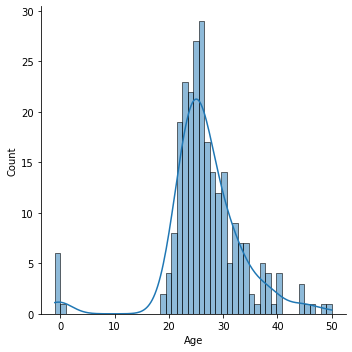

In [22]:
bins = 50
sns.displot(AA_Bootcamp['Age'],bins = bins,kde = True)

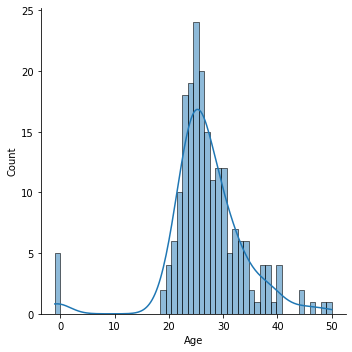

In [23]:
sns.displot(AA_Bootcamp[AA_Bootcamp['gender']== 'male'].Age, bins = bins,kde = True)

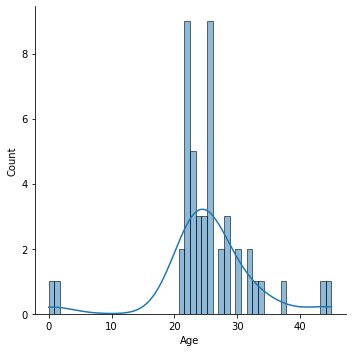

In [24]:
sns.displot(AA_Bootcamp[AA_Bootcamp['gender']== 'female'].Age,bins= bins,kde = True)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [25]:
#here your codes
#here your codes
# H0 : Mu = 24 
# H1 : Mu != 24
from scipy.stats import wilcoxon
stat, p = wilcoxon(AA_Bootcamp.Age - 24)
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
    print('ho mu=24 (fail to reject H0)')
else:
    print('h1 mu!= 24 (reject H0)')

Statistics=5282.50, p=0.00
h1 mu!= 24 (reject H0)


### 5. Calculate the average age of participants for each communication channel

In [ ]:
#here your codes

### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'Boxplot of applicants by communication channels')

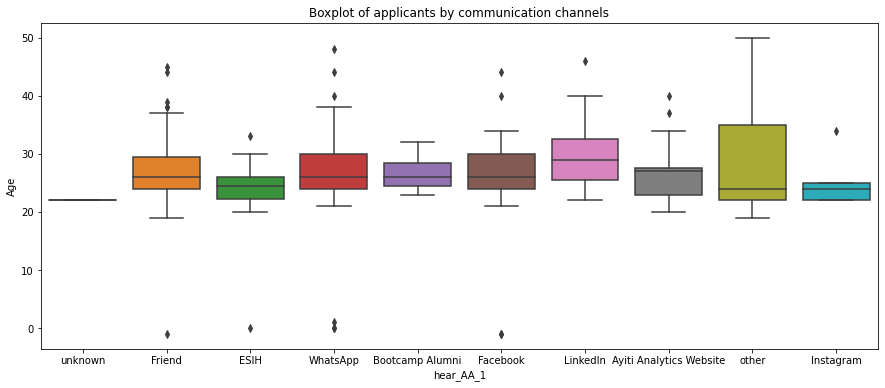

In [26]:
#here your codes
plt.figure(figsize=(15,6))
sns.boxplot(data=AA_Bootcamp,x="hear_AA_1",y="Age")
plt.title('Boxplot of applicants by communication channels')

In [27]:
#here your codes
display( AA_Bootcamp['Age'].groupby(by= AA_Bootcamp['hear_AA_1']).mean())

hear_AA_1
Ayiti Analytics Website    27.200000
Bootcamp Alumni            26.642857
ESIH                       23.777778
Facebook                   26.275000
Friend                     26.835821
Instagram                  25.400000
LinkedIn                   30.200000
WhatsApp                   26.727273
other                      28.666667
unknown                    22.000000
Name: Age, dtype: float64

### 7 .Is there a significant age difference between these groups

In [31]:
Facebook_list_age = AA_Bootcamp[AA_Bootcamp['hear_AA_1'] == 'Facebook']['Age'].values
Unknown_list_age = AA_Bootcamp[AA_Bootcamp['hear_AA_1'] == 'unknown']['Age'].values
Friend_list_age = AA_Bootcamp[AA_Bootcamp['hear_AA_1'] == 'Friend']['Age'].values
ESIH_list_age = AA_Bootcamp[AA_Bootcamp['hear_AA_1'] == 'ESIH']['Age'].values
WhatsApp_list_age = AA_Bootcamp[AA_Bootcamp['hear_AA_1'] == 'WhatsApp']['Age'].values
Bootcamp_Alumni_list_age = AA_Bootcamp[AA_Bootcamp['hear_AA_1'] == 'Bootcamp Alumni']['Age'].values
LinkedIn_list_age = AA_Bootcamp[AA_Bootcamp['hear_AA_1'] == 'LinkedIn']['Age'].values
Ayiti_Analytics_Website_list_age = AA_Bootcamp[AA_Bootcamp['hear_AA_1'] == 'Ayiti Analytics Website']['Age'].values
other_list_age = AA_Bootcamp[AA_Bootcamp['hear_AA_1'] == 'other']['Age'].values
Instagram_list_age = AA_Bootcamp[AA_Bootcamp['hear_AA_1'] == 'Instagram']['Age'].values

In [36]:
#here your codes
# Ho : There is no difference between the mean of these groups
# h1 : There is a difference between the mean of these groups

stat, p = stats.f_oneway(Facebook_list_age, Unknown_list_age, Friend_list_age, ESIH_list_age, WhatsApp_list_age, Bootcamp_Alumni_list_age, LinkedIn_list_age, Ayiti_Analytics_Website_list_age, other_list_age, Instagram_list_age)
print(p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")


0.5194579996223385
Hypothesis Accepted


### 8.Plan a BA strategy for each communication channel regarding the age group

In [ ]:
#here your codes

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [40]:
#here your codes
res =AA_Bootcamp.gender.value_counts(normalize=True).to_frame()
display(res)
gender_table = pd.pivot_table(AA_Bootcamp,'Age',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
gender_table = gender_table.sort_values(by= ('count','female'),ascending = False)



,gender
male,0.812
female,0.188


In [79]:
my_pivot['Probabilty of being female and being in each communications channels'] =gender_table[('count','female')]/AA_Bootcamp.shape[0]
my_pivot['Probabilty of being male and being in each communications channels'] = gender_table[('count','male')]/AA_Bootcamp.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being female and being in each communications channels','Probabilty of being male and being in each communications channels']]
display(my_pivot)


NameError: name 'my_pivot' is not defined

In [43]:
my_pivot['male'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["male","gender"]
my_pivot['female'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["female","gender"]
my_pivot.loc[:,['female']]

NameError: name 'my_pivot' is not defined

### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [80]:
#here your codes
my_pivot.loc[:,['male']]

NameError: name 'my_pivot' is not defined

### 11. Deduce the probability of being a woman knowing each communication channel

### 13. Deduce the probability of being a woman knowing each communication channel

In [76]:
#here your codes

### 14. Deduce the probability of being a man knowing each communication channel

### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

In [64]:
#here
com_table = pd.pivot_table(AA_Bootcamp,'Age',index='hear_AA_1',columns=['after_AA'],aggfunc = ['count'],fill_value=0,margins = True)
com_table
stat, p, dof,s= chi2_contingency(com_table) 
print("p value: " + str(p)) 
if p <= 0.05: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 1.2931351228431785e-10
Reject NULL HYPOTHESIS


In [65]:
from scipy.stats import chi2_contingency
stat, p, dof,s= chi2_contingency(com_table) 
print("p value: " + str(p)) 
if p <= 0.05: 
  print('Reject NULL HYPOTHESIS') 
else: 
  print('ACCEPT NULL HYPOTHESIS') 

p value: 1.2931351228431785e-10
Reject NULL HYPOTHESIS


### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

gender,female,male,All
hear_AA_1,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


p value: 0.5496916447443122
ACCEPT NULL HYPOTHESIS


<Figure size 360x1080 with 0 Axes>

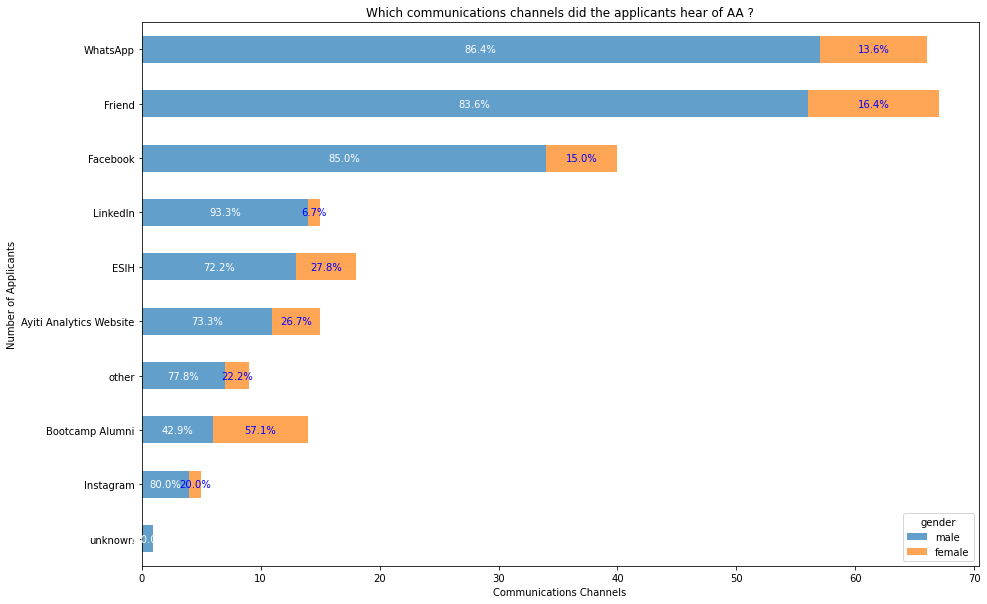

gender,female,male,All
hear_AA_1,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


In [67]:
# here your codes
def my_chisqure_test(data=AA_Bootcamp,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):
  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values="Age",aggfunc="count",fill_value=0,margins = True)
  display(result1)
  stat, p, dof,s= chi2_contingency(result1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else: 
    print('ACCEPT NULL HYPOTHESIS') 
  # Force the aspect ratio of the blocks to be equal using "square" parameter
  plt.figure(figsize=figsize)
  if heatmap:
    ax = sns.heatmap(result1,cmap="YlGnBu", linewidths=.5,
    annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=True ,square = True)
    plt.yticks(rotation=0)
  else:
    values = result1.iloc[:-1,:].sort_values(by =('male'),ascending=True)
    ax =values.sort_values(by =('male'),ascending=True)[[('male'),('female')]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
    ylab = ax.set_ylabel('Number of Applicants')
    xlab = ax.set_xlabel('Communications Channels')
    title = ax.set_title('Which communications channels did the applicants hear of AA ?')

    index =0
    for male, female ,total in zip(values[('male')],values[('female')], values[('All')]):
      if male != total and  female != total  :
        ax.text(male/2 ,
                index,
                str(np.round((male/total)*100,1)) + "%",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
                )
        ax.text(male + female/2 ,
              index,
              str(np.round((female/total)*100,1)) + "%",
              fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
            )
      elif female == total:
        ax.text(female/2 ,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )
      else:
        ax.text(male/2 ,
            index,
            str(np.round((male/total)*100,1)) + "%",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )       
   
    
      index+=1
  plt.show()
  return result1
my_chisqure_test(AA_Bootcamp,columns=['hear_AA_1','gender'],significance_level=0.05,figsize=(5,15),heatmap=False) 



### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [ ]:
#here your codes

### 18.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender

In [ ]:
# here your codes

### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [70]:
pro_int  = pd.pivot_table(data=AA_Bootcamp[AA_Bootcamp['Payed'] == 'Yes'],columns='after_AA',index=['Payed','hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
pro_int = result12 /AA_Bootcamp[AA_Bootcamp['Payed'] == 'Yes'].shape[0]
pro_int

after_AA                              Finding a job/internship  \
Payed hear_AA_1               gender                             
Yes   Ayiti Analytics Website male                    0.000237   
      Bootcamp Alumni         female                  0.000237   
                              male                    0.000000   
      ESIH                    male                    0.000237   
      Facebook                female                  0.000000   
                              male                    0.000237   
      Friend                  female                  0.000237   
                              male                    0.000473   
      Instagram               male                    0.000237   
      LinkedIn                female                  0.000000   
                              male                    0.000237   
      WhatsApp                female                  0.000237   
                              male                    0.000710   
      other                   female                  0.000000   
                              male                    0.000000   
All                                                   0.003077   

after_AA                              Improving my data analysis skills  \
Payed hear_AA_1               gender                                      
Yes   Ayiti Analytics Website male                             0.000237   
      Bootcamp Alumni         female                           0.000237   
                              male                             0.001183   
      ESIH                    male                             0.000473   
      Facebook                female                           0.000473   
                              male                             0.001183   
      Friend                  female                           0.000473   
                              male                             0.003314   
      Instagram               male                             0.000000   
      LinkedIn                female                           0.000237   
                              male                             0.000237   
      WhatsApp                female                           0.000710   
                              male                             0.000710   
      other                   female                           0.000000   
                              male                             0.000237   
All                                                            0.009704   

after_AA                              Mentorship  Switching careers  \
Payed hear_AA_1               gender                                  
Yes   Ayiti Analytics Website male      0.000000           0.000000   
      Bootcamp Alumni         female    0.000000           0.000237   
                              male      0.000000           0.000000   
      ESIH                    male      0.000000           0.000000   
      Facebook                female    0.000000           0.000000   
                              male      0.000000           0.000000   
      Friend                  female    0.000000           0.000000   
                              male      0.000000           0.000000   
      Instagram               male      0.000000           0.000000   
      LinkedIn                female    0.000000           0.000000   
                              male      0.000000           0.000000   
      WhatsApp                female    0.000000           0.000000   
                              male      0.000000           0.000000   
      other                   female    0.000237           0.000000   
                              male      0.000000           0.000000   
All                                     0.000237           0.000237   

after_AA                              Training to start my own company  \
Payed hear_AA_1               gender                                     
Yes   Ayiti Analytics Website mal

In [71]:
prob  = pd.pivot_table(data=AA_Bootcamp[AA_Bootcamp['Payed'] == 'no'],columns='after_AA',index=['Payed','hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
prob = prob /AA_Bootcamp[AA_Bootcamp['Payed'] == 'no'].shape[0]
prob

after_AA                              Finding a job/internship  \
Payed hear_AA_1               gender                             
no    Ayiti Analytics Website female                  0.000000   
                              male                    0.000000   
      Bootcamp Alumni         female                  0.010811   
                              male                    0.000000   
      ESIH                    female                  0.000000   
                              male                    0.005405   
      Facebook                female                  0.010811   
                              male                    0.037838   
      Friend                  female                  0.016216   
                              male                    0.021622   
      Instagram               female                  0.000000   
                              male                    0.005405   
      LinkedIn                male                    0.005405   
      WhatsApp                female                  0.000000   
                              male                    0.037838   
      other                   female                  0.000000   
                              male                    0.010811   
      unknown                 male                    0.000000   
All                                                   0.162162   

after_AA                              Improving my data analysis skills  \
Payed hear_AA_1               gender                                      
no    Ayiti Analytics Website female                           0.010811   
                              male                             0.032432   
      Bootcamp Alumni         female                           0.010811   
                              male                             0.000000   
      ESIH                    female                           0.016216   
                              male                             0.037838   
      Facebook                female                           0.000000   
                              male                             0.070270   
      Friend                  female                           0.021622   
                              male                             0.097297   
      Instagram               female                           0.000000   
                              male                             0.000000   
      LinkedIn                male                             0.043243   
      WhatsApp                female                           0.016216   
                              male                             0.108108   
      other                   female                           0.005405   
                              male                             0.010811   
      unknown                 male                             0.000000   
All                                                            0.481081   

after_AA                              Mentorship  Switching careers  \
Payed hear_AA_1               gender                                  
no    Ayiti Analytics Website female    0.000000           0.005405   
                              male      0.005405           0.005405   
      Bootcamp Alumni         female    0.000000           0.000000   
                              male      0.000000           0.000000   
      ESIH                    female    0.005405           0.000000   
                              male      0.000000           0.000000   
      Facebook                female    0.010811           0.000000   
                              male      0.005405           0.016216   
      Friend                  female    0.000000           0.000000   
                              male      0.005405           0.021622   
      Instagram               female    0.000000           0.000000   
                              male      0.000000           0.005405   
      LinkedIn                male      0.0

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [72]:
# here your codes
ProP = pd.pivot_table(data=AA_Bootcamp,columns='after_AA',index=['hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
ProP=AA_Bootcamp[AA_Bootcamp['Payed'] == 'Yes'].shape[0]/ProP
ProPN = result12*ProP
ProPN.fillna(0)
display(ProPN)
ProPN.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']

after_AA                                   All  Finding a job/internship  \
hear_AA_1               gender Payed                                       
                               All         NaN                       NaN   
All                            NaN         NaN                       NaN   
Ayiti Analytics Website female NaN         NaN                       NaN   
                        male   Yes    0.272727                  1.000000   
Bootcamp Alumni         female Yes    0.375000                  0.333333   
                        male   Yes    0.833333                       NaN   
ESIH                    female NaN         NaN                       NaN   
                        male   Yes    0.307692                  0.500000   
Facebook                female Yes    0.333333                  0.000000   
                        male   Yes    0.205882                  0.125000   
Friend                  female Yes    0.272727                  0.250000   
                        male   Yes    0.339286                  0.333333   
Instagram               female NaN         NaN                       NaN   
                        male   Yes    0.250000                  0.500000   
LinkedIn                female Yes    1.000000                       NaN   
                        male   Yes    0.142857                  0.500000   
WhatsApp                female Yes    0.444444                  1.000000   
                        male   Yes    0.157895                  0.300000   
other                   female Yes    0.500000                       NaN   
                        male   Yes    0.142857                  0.000000   
unknown                 male   NaN         NaN                       NaN   

after_AA                              Improving my data analysis skills  \
hear_AA_1               gender Payed                                      
                               All                                  NaN   
All                            NaN                                  NaN   
Ayiti Analytics Website female NaN                                  NaN   
                        male   Yes                             0.142857   
Bootcamp Alumni         female Yes                             0.333333   
                        male   Yes                             1.000000   
ESIH                    female NaN                                  NaN   
                        male   Yes                             0.222222   
Facebook                female Yes                             1.000000   
                        male   Yes                             0.277778   
Friend                  female Yes                             0.333333   
                        male   Yes                             0.437500   
Instagram               female NaN                                  NaN   
                        male   Yes                                  NaN   
LinkedIn                female Yes                             1.000000   
                        male   Yes                             0.111111   
WhatsApp                female Yes                             0.500000   
                        male   Yes                             0.130435   
other                   female Yes                             0.000000   
                        male   Yes                             0.333333   
unknown                 male   NaN                                  NaN   

after_AA                              Mentorship  Switching careers  \
hear_AA_1               gender Payed                                  
                               All           NaN                NaN   
All                            NaN           NaN                NaN   
Ayiti Analytics Website female NaN           NaN                NaN   
                        male   Yes           0.0                0.0   
Bootcamp Alumni         female Yes           NaN                1.0   
                        male

Payed
Yes    0.4375
Name: Improving my data analysis skills, dtype: float64

In [74]:
a = pd.pivot_table(data=AA_Bootcamp,columns='after_AA',index=['hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
a=AA_Bootcamp[AA_Bootcamp['Payed'] == 'no'].shape[0]/a
b = result123*a
display(b)
b.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills'] 

after_AA                              Finding a job/internship  \
hear_AA_1               gender Payed                             
                               All                         NaN   
All                            NaN                         NaN   
Ayiti Analytics Website female no                          NaN   
                        male   no                     0.000000   
Bootcamp Alumni         female no                     0.666667   
                        male   no                          NaN   
ESIH                    female no                          NaN   
                        male   no                     0.500000   
Facebook                female no                     1.000000   
                        male   no                     0.875000   
Friend                  female no                     0.750000   
                        male   no                     0.666667   
Instagram               female no                          NaN   
                        male   no                     0.500000   
LinkedIn                female NaN                         NaN   
                        male   no                     0.500000   
WhatsApp                female no                     0.000000   
                        male   no                     0.700000   
other                   female no                          NaN   
                        male   no                     1.000000   
unknown                 male   no                          NaN   

after_AA                              Improving my data analysis skills  \
hear_AA_1               gender Payed                                      
                               All                                  NaN   
All                            NaN                                  NaN   
Ayiti Analytics Website female no                              1.000000   
                        male   no                              0.857143   
Bootcamp Alumni         female no                              0.666667   
                        male   no                              0.000000   
ESIH                    female no                              1.000000   
                        male   no                              0.777778   
Facebook                female no                              0.000000   
                        male   no                              0.722222   
Friend                  female no                              0.666667   
                        male   no                              0.562500   
Instagram               female no                                   NaN   
                        male   no                                   NaN   
LinkedIn                female NaN                                  NaN   
                        male   no                              0.888889   
WhatsApp                female no                              0.500000   
                        male   no                              0.869565   
other                   female no                              1.000000   
                        male   no                              0.666667   
unknown                 male   no                                   NaN   

after_AA                              Mentorship  Switching careers  \
hear_AA_1               gender Payed                                  
                               All           NaN                NaN   
All                            NaN           NaN                NaN   
Ayiti Analytics Website female no            NaN                1.0   
                        male   no            1.0                1.0   
Bootcamp Alumni         female no            NaN                0.0   
                        male   no            NaN                NaN   
ESIH                    female no            1.0                NaN   
                        male   no            NaN                NaN   
Facebook                female no            

Payed
no    0.5625
Name: Improving my data analysis skills, dtype: float64

### Based on these findings, propose strategies to increase our sales?

In [ ]:
#here your codes